# Daniel Lupercio STAT 725 - HW1
## February 20, 2022

In [28]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


### Chapter 10, Exercise 10. 
Train a deep MLP on the MNIST dataset (you can load it using
keras.datasets.mnist.load_data(). See if you can get over
98% precision. Try searching for the optimal learning rate by using
the approach presented in this chapter (i.e., by growing the learning
rate exponentially, plotting the error, and finding the point where
the error shoots up). Try adding all the bells and whistles—save
checkpoints, use early stopping, and plot learning curves using
TensorBoard


In [29]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [30]:
#mnist = keras.datasets.
# tf.keras.datasets.mnist.load_data(path = 'mnist.npz')
# I will not use the line below for now
# X,y = keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data(path = 'mnist.npz')
# X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, train_size=0.7,random_state=4958)
print(X_train_full.dtype)
print(X_train_full.shape)
# X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.

uint8
(60000, 28, 28)


In [31]:
X_valid, X_train = train_test_split(X_train_full, train_size=0.7, random_state=4958) 
X_valid = X_valid/255.
X_train = X_train/255.
X_test = X_test/255.
# y_valid, y_train = y_train_full[:5000], y_train_full[5]

In [32]:
print(X_valid.dtype)
print(X_valid.shape)
print(X_test.shape)

float64
(42000, 28, 28)
(10000, 28, 28)


I will apply the same code to a y_validation, and y_train sets. These sets do not need to be divided by 255, to get a 0-1 range.

In [33]:
y_valid, y_train = train_test_split(y_train_full, train_size=0.7, random_state=4958) 
y_valid = y_valid
y_train = y_train
y_test = y_test

Something is not right, the y_train is returning floats instead of unit8. -Update, this has been fixed.

In [34]:
print(y_valid.dtype)
print(y_valid.shape)
print(y_train)

uint8
(42000,)
[9 3 4 ... 5 3 4]


Testing to see if the X_train set is working

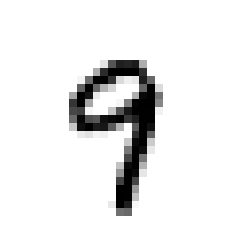

In [23]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()